## Objective: To create a regression model for predicting housing prices (column 'median_house_value') from the California Housing Prices dataset

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [2]:
# load the required libraries using pyforest
import pyforest

## Exploratory data analysis (EDA)

+ EDA
+ Load the data.
+ Look at the median_house_value variable. Does it have a long tail?

In [3]:
df = pd.read_csv('housing.csv')
df.head()

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# no need to replace spaces with _ or change to lower cases, all column names are already worked out
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
# let's explore each columns of the dataset
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # checking all unique values
    print(df[col].nunique()) # checking number of unique values
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

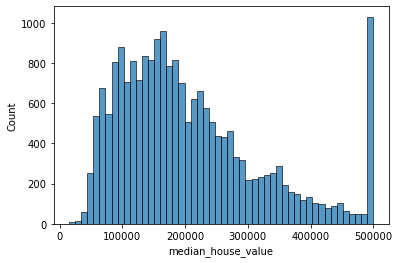

In [6]:
# plotting histogram of the column 'median_house_value'
sns.histplot(df.median_house_value, bins=50)

There is no long tail in the distribution

Features
For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
Select only them.

In [7]:
# selecting columns of interest
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1
### Find a feature with missing values. How many missing values does it have?

+ 207
+ 307
+ 408
+ 508

In [8]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Answer #1 : The feature 'total bedrooms' has missing values of 207

### Question 2
### What's the median (50% percentile) for variable 'population'?

+ 1133
+ 1122
+ 1166
+ 1188

In [9]:
df['population'].median()

1166.0

### Answer #2 : The median (50% percentile) for variable 'population' is 1166

## Dataset preparation

+ Split the data
+ Shuffle the initial dataset, use seed 42.
+ Split your data in train/val/test sets, with 60%/20%/20% distribution.
+ Make sure that the target value ('median_house_value') is not in your dataframe.
+ Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [10]:
# checking the length of entire dataset
n = len(df)
n 

20640

In [11]:
# splitting the data
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-(n_val+n_test)

In [12]:
#checking if all datasets are splitted as we wanted
n_train+n_val+n_test

20640

In [13]:
# shuffling the data with random seed 42 for reproducibility
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# applying the shuffling to the entire dataset
df_shuffled = df.iloc[idx]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# selecting our datasets uisng iloc function

df_train = df_shuffled.iloc[idx[:n_train]]
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffled.iloc[idx[n_train+n_val:]]


these both do same things
+ df_shuffled = df.iloc[idx]
+ df_train = df_shuffled.iloc[:n_train]

In [15]:
# resetting the index number

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
# declare y (target) variable and apply log transformation to it for more compact values

# keeping the originals
y_train_origi = df_train.median_house_value.values
y_val_origi = df_val.median_house_value.values
y_test_origi = df_test.median_house_value.values

# for training 
y_train = np.log1p(y_train_origi)
y_val = np.log1p(y_val_origi)
y_test = np.log1p(y_test_origi)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# deleting the target variable from the dataset

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Linear regression

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [19]:
# defining the function to calculate rmse error
def rmse(y,y_pred):
    error = y_pred-y
    mse=(error**2).mean()
    return np.sqrt(mse)

In [20]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [21]:
# creating baseline model (with all numerical columns)
base =  ['latitude','longitude','housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

def prepare_X(df, fillna_value):
    df_num = df[base]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

## Question 3
+ We need to deal with missing values for the column from Q1.
+ We have two options: fill it with 0 or with the mean of this variable.
+ Try both options. For each, train a linear regression model without regularization using the code from the lessons.
+ For computing the mean, use the training only!
+ Use the validation dataset to evaluate the models and compare the RMSE of each option.
+ Round the RMSE scores to 2 decimal digits using round(score, 2)
+ Which option gives better RMSE?

### option 1: filling missing values in the target column with it's mean value

In [22]:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# apply it to he validation set
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [24]:
# check the rmse value:
np.round(rmse(y_val, y_mean_pred_val),2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.34

### option 2: filling missing values in the target column with 0

In [25]:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [27]:
# check the rmse value:
np.round(rmse(y_val, y_null_pred_val),2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.34

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Count'>

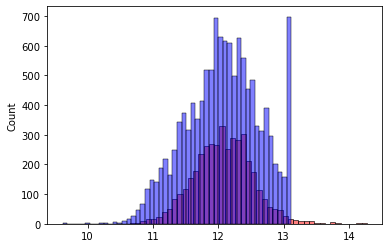

In [28]:
# looking at the distribution
sns.histplot(y_mean_pred_val, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Count'>

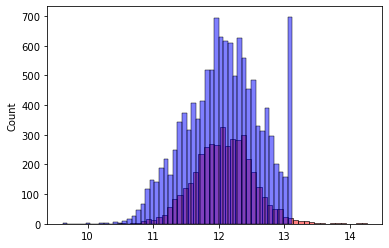

In [29]:
sns.histplot(y_null_pred_val, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### Answer #3 : FIlling the missing values with mean and 0 in the column 'total bedrooms', both give better rmse

### Question 4
+ Now let's train a regularized linear regression.
+ For this question, fill the NAs with 0.
+ Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
+ Use RMSE to evaluate the model on the validation dataset.
+ Round the RMSE scores to 2 decimal digits.
+ Which r gives the best RMSE?

#### Training a regularised linear regression

In [30]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [31]:
# filling with NA's with 0, and
# Trying different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0 -11.656344589116724 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1e-06 -11.6563286999959 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.0001 -11.654755894883008 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.001 -11.640477102905152 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.01 -11.499589722101415 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.1 -10.25799842660841 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1 -4.93161357253164 0.35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5 -1.489184857385844 0.35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10 -0.7941313736374382 0.35


### Answer #4 : The best value of rmse (0.34) is produced by r = 0


In [32]:
max(-11.656344589116724,-11.6563286999959,-11.654755894883008,-11.640477102905152,-11.499589722101415)

-11.499589722101415

In [33]:
max(-11.656344589116724,-11.6563286999959)

-11.6563286999959

In [34]:
min(0, 0.000001)

0

### Question 5
+ We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
+ Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
+ For each seed, do the train/validation/test split with 60%/20%/20% distribution.
+ Fill the missing values with 0 and train a model without regularization.
+ For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
+ What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
+ Round the result to 3 decimal digits (round(std, 3))
+ Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

#### trying out different seed values

In [35]:
rmse_scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_origi = df_train.median_house_value.values
    y_val_origi = df_val.median_house_value.values
    y_test_origi = df_test.median_house_value.values

    y_train = np.log1p(y_train_origi)
    y_val = np.log1p(y_val_origi)
    y_test = np.log1p(y_test_origi)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_scores.append(rmse_val)
    
    print('seed = {}, rmse = {}'.format(s,rmse_val) )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 0, rmse = 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 1, rmse = 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 2, rmse = 0.33


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 3, rmse = 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 4, rmse = 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 5, rmse = 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 6, rmse = 0.35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 7, rmse = 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 8, rmse = 0.35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

seed = 9, rmse = 0.34


In [36]:
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

np.round(np.std(rmse_scores),3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.005

### Answer #5 :the standard deviation of all the scores is 0.005

### Question 6
+ Split the dataset like previously, use seed 9.
+ Combine train and validation datasets.
+ Fill the missing values with 0 and train a model with r=0.001.
+ What's the RMSE on the test dataset?

In [37]:
s = 9

idx = np.arange(n)
np.random.seed(s)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_all = [df_train, df_val]
df_train_val = pd.concat(df_all)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_origi = df_train_val.median_house_value.values
y_test_origi = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_origi)
y_test = np.log1p(y_test_origi)

del df_train_val['median_house_value']
del df_test['median_house_value']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.35

### Answer #6 :the rmse on the test dataset is 0.35